# My Mathematical Adventures with Covid-19

The world is in Crisis with the virus known as Covid-19 and Nigeria is at risk, I decided to make it my business to keep track of the cases in Nigeria. The purpose of this notebook is purely educational, I have become fascinated by the math behind ***epidemiology***, I see it as a means of learning Maths and data science.

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Daily update of covid-19 in Nigeria.

In [22]:
full_df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df = full_df[full_df['Country'].isin(["Nigeria"])]
dataframe = df.pivot(index='Date', columns='Country', values='Confirmed')

In [32]:
#Getting the daily cases
i = len(dataframe.Nigeria)
daily = np.array([],int)
for _ in range(0,len(dataframe.Nigeria)-1):
    i -= 1
    daily = np.append(daily, (dataframe.Nigeria[i] - dataframe.Nigeria[i-1]))    
daily = np.flip(daily)
daily = np.append(0,daily)

Show data

In [121]:
df

,Date,Country,Confirmed,Recovered,Deaths
126,2020-01-22,Nigeria,0,0,0
314,2020-01-23,Nigeria,0,0,0
502,2020-01-24,Nigeria,0,0,0
690,2020-01-25,Nigeria,0,0,0
878,2020-01-26,Nigeria,0,0,0
...,...,...,...,...,...
27950,2020-06-18,Nigeria,18480,6307,475
28138,2020-06-19,Nigeria,19147,6581,487
28326,2020-06-20,Nigeria,19808,6718,506
28514,2020-06-21,Nigeria,20244,6879,518


In [119]:
dataframe["Daily"] = daily

In [120]:
dataframe

Country,Nigeria,Daily
Date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2020-06-18,18480,745
2020-06-19,19147,667
2020-06-20,19808,661


In [33]:
dataframe.tail()

Country,Nigeria
Date,
2020-06-18,18480
2020-06-19,19147
2020-06-20,19808
2020-06-21,20244
2020-06-22,20919


Pandemics like covid-19 grow at an exponential rate. The *Graph I* below shows the Total Number of cases with respect to time of the outbreak.

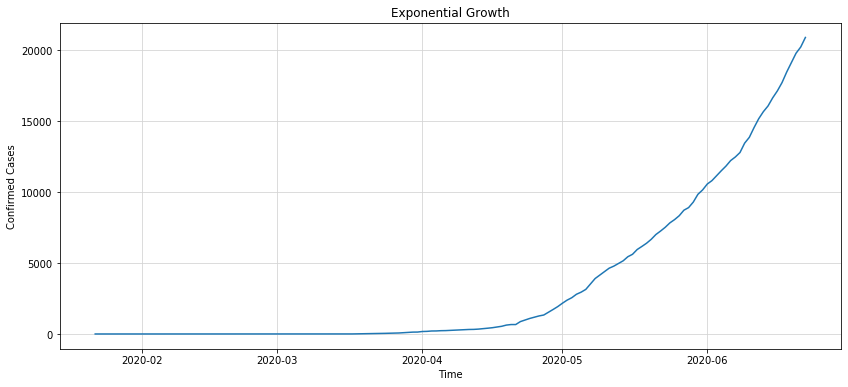

In [38]:
plt.figure(figsize=(14,6))
plt.plot(dataframe.index, dataframe.Nigeria)
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.grid(color='#d4d4d4')
plt.title("Exponential Growth");

If you take the derivatives at each point you get the rate of change as shown on *Graph II*.

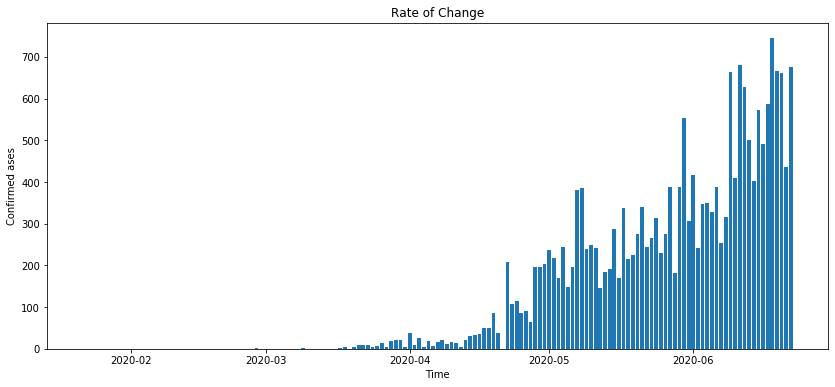

In [42]:
plt.figure(figsize=(14,6))
plt.bar(dataframe.index,daily)
plt.title("Rate of Change")
plt.xlabel("Time")
plt.ylabel("Confirmed ases");

The third graph is a Logarithmic of the covid-19 data.

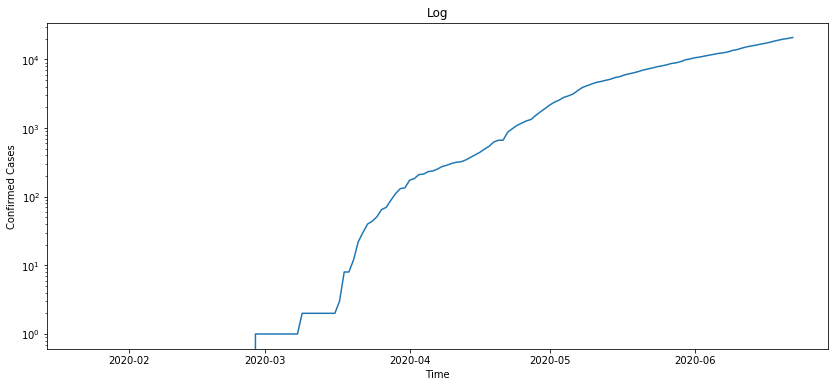

In [44]:
plt.figure(figsize=(14,6))
plt.title("Log")
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.yscale("log")
plt.plot(dataframe.index,dataframe.Nigeria )

## Predictions

Using the data I will be predicting the amount of new cases in Nigeria. 

The equation used to predict logistic growth is.

$ Nd = (1 + E*P)^{d}*No $

where: <br> &emsp; Nd = the number of cases to be predicted. <br> &emsp; E  = the Average number of people someone infected is exposed to each day.<br> &emsp; P  = Probability of becoming a new infection <br> &emsp; d  = day to be predicted. <br> &emsp; No = Current Number of cases.

Another important equation for the predition is the ***growth factor*** given as:

$$ Growth factor = \frac{Cases\space of\space Today}{Cases\space of\space Yesterday} $$

or

$$Growth factor = 1 + E*P $$

In [116]:
def predict(x):
    Growthfactor = daily[-1]/daily[-2]
    pred = ((Growthfactor) ** x) * dataframe.Nigeria[-1]
    print("The Growth factor is", Growthfactor ,"\nThe predicted Value is" ,int(round(pred,0)))

predict(1)

The Growth factor is 1.548165137614679 
The predicted Value is 32386


## Reference

The explanation of the maths in the Notebook can found here [Exponential growth and epidemics](https://www.youtube.com/watch?v=Kas0tIxDvrg ), the YouTube video by 3Blue1Brown